In [1]:

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image

In this report, we look at different types of color spaces, including RGB and HIS let's pay
Also, in the second exercise, we will examine other types of color spaces Let's quantize the colors and check the image quality in different situations .
In this exercise, we will convert the image of Marboza from RGB format to HSI format. For this Our task is to produce 3 branches H, S and I Each of the following relations is obtained: \\
For this purpose, we defined 3 functions that produce this format according to the previous relations.
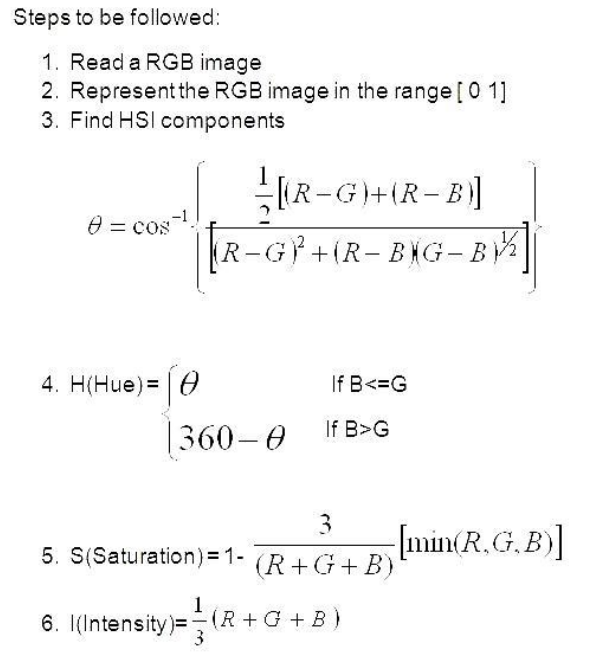


Problem 6.1.1 :

In [3]:



def Saturation(channels):
        (R, G, B) = channels
        min_value = np.minimum(np.minimum(R, G), B)
        return 1 - (3 * min_value)/ (R + G + B)

    
def Intensity(channels):
        (R, G, B) = channels
        return (R + G + B )/3

   
    
def Hue(channels):
        (R, G, B) = channels
        result_hue = np.copy(R)

        for i in range(0, B.shape[0]):
            for j in range(0, B.shape[1]):
                # Calculate numerator = ( 0.5 * [(R - G) + (R - B)] )
                numerator = 0.5 * ((R[i][j] - G[i][j]) + (R[i][j] - B[i][j]))
                
                # Calculate denominator = ([(R - G)^2 + (R - B)(G - B)]^0.5)
                denominator = math.sqrt((R[i][j] - G[i][j])**2 + ((R[i][j] - B[i][j]) * (G[i][j] - B[i][j])))
                
                # Calculate divistion = numerator / denominator
                divistion = np.divide(numerator, denominator)
                
                # Calculate theta = arccos(divistion)
                result_hue[i][j] = math.acos(divistion)

                # If B > G then H = 360 - theta
                if B[i][j] > G[i][j]:
                    result_hue[i][j] = ((360 * math.pi) / 180.0) - result_hue[i][j]

        return result_hue
        
def R2GtoHSI(image):
        with np.errstate(divide='ignore', invalid='ignore'):
            # here we split the picture to the channels
            block = np.float32(image) / 255
            channels = (block[:,:,2], block[:,:,1], block[:,:,0])

            saturation = Saturation(channels) 
        
            intensity = Intensity(channels)
           
            hue = Hue(channels)
            
            # Merge channels into one image
            hsi_img = cv2.merge((hue, saturation, intensity))


            figure = plt.figure(figsize=(15,15))

            figure.add_subplot(1,3,1)
            plt.title("hue")
            plt.imshow(hue, cmap="gray")
          
            figure.add_subplot(1,3,2)
            plt.title("saturation")
            plt.imshow(saturation, cmap="gray")
           
            figure.add_subplot(1,3,3)
            plt.title("intensity")
            plt.imshow(intensity, cmap="gray")


            return hsi_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


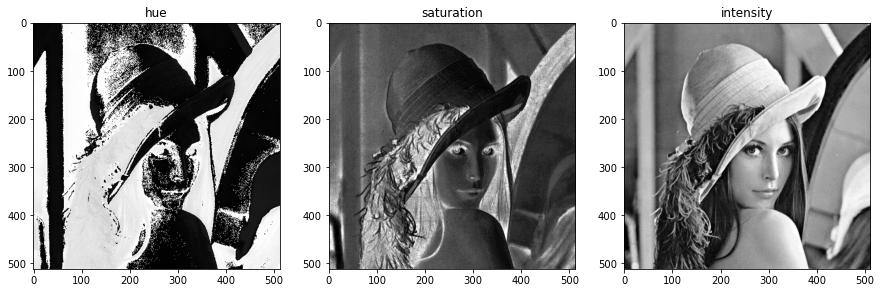

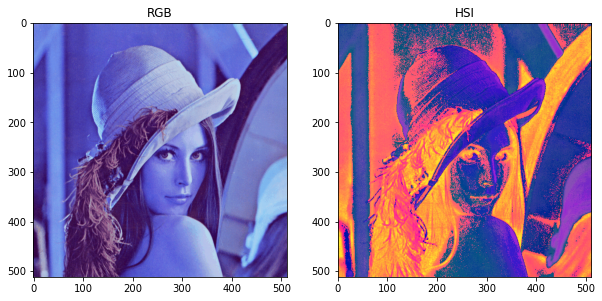

In [4]:
    img = cv2.imread("Lena.bmp")
   

    #here we cnvert RGB to HSI
    
    hsi = R2GtoHSI(img)

  
    figure = plt.figure(figsize=(10,10))
    figure.add_subplot(1,2,1)
    plt.title("RGB")
    plt.imshow(img, cmap="gray")
    figure.add_subplot(1,2,2)
    plt.title("HSI")
    plt.imshow(hsi, cmap="gray")


Problen 6.2.1 :
In this problem, we try to quantize the image to 64 and 32 and 16 and 8 modes for this function under the title quan_func() definition We have done that it takes the image and also takes the specified value and takes the corresponding number turns

In [31]:
def quan_fanc(array, L):
  
    #     here  we want to quantize the numbers into L level
    coeff = 256//L
    return (array // coeff) * coeff
def MSE(image, new_Image):
    # cumulative difference 
    err = np.sum((image.astype("float") - new_Image.astype("float")) ** 2)

    # divide by length*width
    err /= float(image.shape[0] * new_Image.shape[1])
	
    return format(err,'.6f')


In [29]:
from skimage.metrics import peak_signal_noise_ratio
lena = cv2.imread('Lena.bmp',cv2.IMREAD_GRAYSCALE)

MSE :  3.521683
PSNR : 42.66330132120192


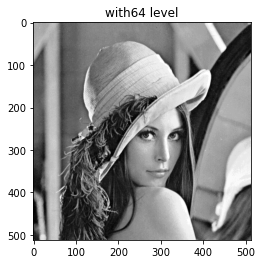

In [35]:
lena64 = quan_fanc(lena.copy(),64)
plt.imshow(lena64 , cmap='gray')
plt.title("with64 level")
print("MSE : " , MSE(lena, lena64))
print("PSNR : " + str(peak_signal_noise_ratio(lena , lena64)))

MSE :  17.090836
PSNR : 35.80317064962315


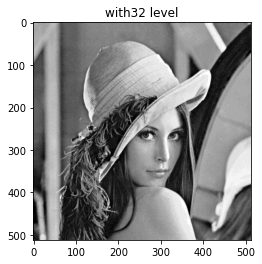

In [36]:
lena32 = quan_fanc(lena.copy(),32)
plt.imshow(lena32 , cmap='gray')
plt.title("with32 level")
print("MSE : " , MSE(lena, lena32))
print("PSNR : " + str(peak_signal_noise_ratio(lena , lena32)))

MSE :  78.838150
PSNR : 29.16343936072466


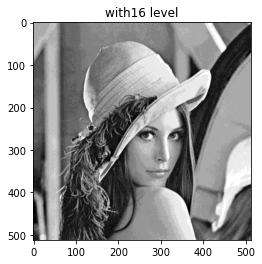

In [37]:
lena16 = quan_fanc(lena.copy(),16)
plt.imshow(lena16 , cmap='gray')
plt.title("with16 level")
print("MSE : " , MSE(lena, lena16))
print("PSNR : " + str(peak_signal_noise_ratio(lena , lena16)))

MSE :  313.441666
PSNR : 23.169236343419712


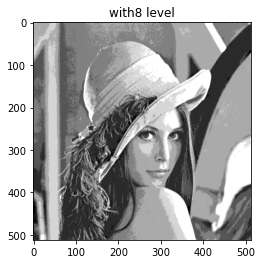

In [38]:
lena8 = quan_fanc(lena.copy(),8)
plt.imshow(lena8 , cmap='gray')
plt.title("with8 level")
print("MSE : " , MSE(lena, lena8))
print("PSNR : " + str(peak_signal_noise_ratio(lena , lena8)))

Text(0.5, 1.0, 'with2 level')

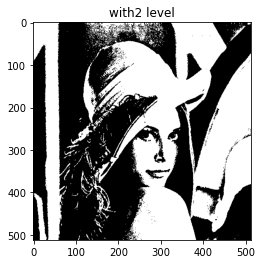

In [28]:
lena2 = quan_fanc(lena.copy(),2)
plt.imshow(lena2 , cmap='gray')
plt.title("with2 level")

Problem 6.2.2:
In this part, we want to divide the R channel into 3 bits or 8 parts Channel G is also divided into 3 bits or 8 parts as well as channel B also divide into 2 bits or 4 parts. In this part of 2 We use a function related to dividing the channel into 3 bits Another is related to dividing it into 2 bits, which is a number between 0 It takes up to 255 and returns the calculated number.

In [5]:
def subset_8(color):
    # colors divided into 8 subsets for each color space
    subsets = [[0,31], [32,63], [64,95], [96,127], [128,159], [160,191], [192,223], [224,255]]
    for index, subset in enumerate(subsets):
        if color >= subset[0] and  color <= subset[1]:
            return 31 * index

def subset_4(color):
    # colors divided into 4 subsets for each color space
     subsets = [[0,63], [64,127], [128,191], [192,255]]
     for index, subset in enumerate( subsets):
        if color >= subset[0] and  color <= subset[1]:
            return 63*index

        
def subset_2(color):
    # colors divided into 2 subsetss for each color space
    subsets = [[0,127], [128,255]]
    for index, subset in enumerate(subsets):
        if color>= subset[0] and color <= subset[1]:
            return 127*index

In [6]:
print(subset_8(102))

93


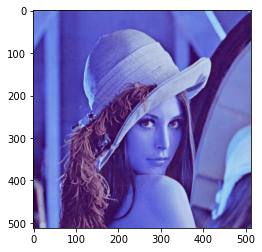

In [7]:
# here we show the real image
img = cv2.imread("Lena.bmp")
plt.imshow(img)

       

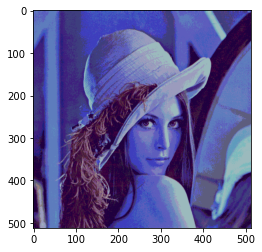

In [8]:
img = cv2.imread("Lena.bmp")
# loop through all pixels and the put the colors into the respective color regions
for rows in img:
    for pixel in rows:
#         we assign a number with 3 bits to R
        pixel[0] = subset_8(pixel[0])
#         we assign a number with 3 bits to R
        pixel[1] = subset_8(pixel[1])
#         we assign a number with 3 bits to R
        pixel[2] = subset_4(pixel[2])
plt.imshow(img)

Problem 6.2.3 :

For this part, we can reduce the image to 32 colors We have to do different things. We have to quantize the colors of each channel in different ways We can do the work in different ways. We try to do it in this way Let's do the work that the number of areas for each channel is preferably the same They should be equal and if not, they should be very close to each other.

(512, 512, 3)


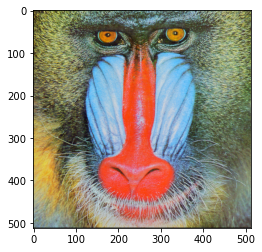

In [9]:
# this is the real image :
img = cv2.imread("Baboon.bmp"  , cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
plt.imshow(img , )
print(img.shape)

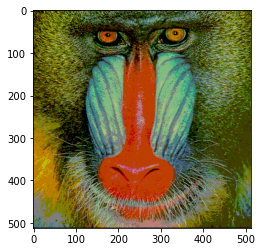

In [10]:
# here we implement the picture we 32 colors
# R = 4 reigens
# G = 4 rigens
# B = 2 reigens
img = cv2.imread("Baboon.bmp")
img = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
# loop through all pixels and the put the colors into the respective color regions
for rows in img:
    for pixel in rows:
#         we assign a number with 3 bits to R
        pixel[0] = subset_4(pixel[0])
#         we assign a number with 3 bits to R
        pixel[1] = subset_4(pixel[1])
#         we assign a number with 3 bits to R
        pixel[2] = subset_2(pixel[2])
plt.imshow(img)

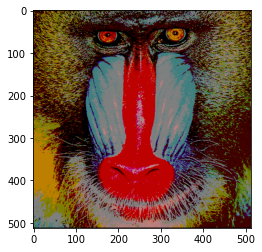

In [11]:
# here we implement the picture we 16 colors
# R = 4 reigens
# G = 4 rigens
# B = 2 reigens
img = cv2.imread("Baboon.bmp")
img = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
# loop through all pixels and the put the colors into the respective color regions
for rows in img:
    for pixel in rows:
#         we assign a number with 3 bits to R
        pixel[0] = subset_4(pixel[0])
#         we assign a number with 3 bits to R
        pixel[1] = subset_2(pixel[1])
#         we assign a number with 3 bits to R
        pixel[2] = subset_2(pixel[2])
plt.imshow(img)

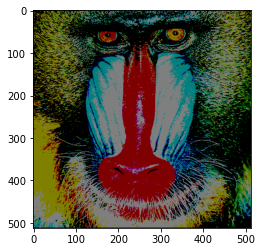

In [12]:
# here we implement the picture we 32 colors
# R = 4 reigens
# G = 4 rigens
# B = 2 reigens
img = cv2.imread("Baboon.bmp")
img = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
# loop through all pixels and the put the colors into the respective color regions
for rows in img:
    for pixel in rows:
#         we assign a number with 3 bits to R
        pixel[0] = subset_2(pixel[0])
#         we assign a number with 3 bits to R
        pixel[1] = subset_2(pixel[1])
#         we assign a number with 3 bits to R
        pixel[2] = subset_2(pixel[2])
plt.imshow(img)